# Nuages de mots

## Imports et stopwords

In [1]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to C:\Users\Alpha
[nltk_data]     Bah\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "pays", "centre", "elles", "cinq", "monde"]
sw = set(sw)


## Créer un fichier contenant le texte de tous les journaux d'une année donnée

In [3]:
# Choisir une année
year = 1969

In [4]:
# Lister les fichiers de cette année
data_path = '../data'
txt_path = '../data/txt'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]
txts

['KB_JB838_1969-01-04_01-00014.txt',
 'KB_JB838_1969-01-05_01-00012.txt',
 'KB_JB838_1969-01-11_01-00010.txt',
 'KB_JB838_1969-01-15_01-00017.txt',
 'KB_JB838_1969-01-22_01-00015.txt',
 'KB_JB838_1969-02-05_01-00021.txt',
 'KB_JB838_1969-02-07_01-00019.txt',
 'KB_JB838_1969-02-09_01-00007.txt',
 'KB_JB838_1969-02-16_01-00031.txt',
 'KB_JB838_1969-02-22_01-00011.txt',
 'KB_JB838_1969-02-27_01-00032.txt',
 'KB_JB838_1969-03-01_01-00023.txt',
 'KB_JB838_1969-03-02_01-00005.txt',
 'KB_JB838_1969-03-02_01-00018.txt',
 'KB_JB838_1969-03-06_01-00021.txt',
 'KB_JB838_1969-03-06_01-00022.txt',
 'KB_JB838_1969-03-11_01-00003.txt',
 'KB_JB838_1969-03-18_01-00014.txt',
 'KB_JB838_1969-03-19_01-00003.txt',
 'KB_JB838_1969-03-22_01-00018.txt',
 'KB_JB838_1969-03-25_01-00017.txt',
 'KB_JB838_1969-03-25_01-00025.txt',
 'KB_JB838_1969-03-28_01-00005.txt',
 'KB_JB838_1969-04-01_01-00007.txt',
 'KB_JB838_1969-04-01_01-00018.txt',
 'KB_JB838_1969-04-02_01-00014.txt',
 'KB_JB838_1969-04-02_01-00021.txt',
 

In [5]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r', encoding="utf-8") as f:
        content_list.append(f.read())

In [6]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

100

In [7]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][:200]

"t Dt» LE SOIR b Bourse de Bruxelles VENDREDI 3 JANVIER Marché toujours soutenu' L'activité est moins étoffée que la Veille et quelques prises de bénéfices donnent à la cote une physionomie moins unifo"

In [9]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w',  encoding="utf-8") as f:
    f.write(' '.join(content_list))

In [10]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{year}.txt'), 'r', encoding="utf-8") as f:
    before = f.read()

before[:500]

"t Dt» LE SOIR b Bourse de Bruxelles VENDREDI 3 JANVIER Marché toujours soutenu' L'activité est moins étoffée que la Veille et quelques prises de bénéfices donnent à la cote une physionomie moins uniformément favorable. Toutefois, plusieurs points de soutien, voire de fermeté, subsistent, tant en Valeurs locales qu’en titres étrangers. Parmi ces derniers, les non- ferreux demeurent très entourés. La demande de Londres est assez importante en R. S. T., 662, et en Zam- blan Anglo où l’ancienne pass"

## Nettoyer le fichier à l'aide d'une fonction de nettoyage

### Créer la fonction de nettoyage (à adapter)

In [11]:
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

### Appliquer la fonction sur le fichier complet de l'année

In [12]:
clean_text(year, folder=temp_path)

'Output has been written in ../data/tmp/1969_clean.txt!'

In [13]:
# Vérifier le résultat
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r') as f:
    after = f.read()

after[:500]

'soir bourse bruxelles vendredi janvier marchÃ© toujours soutenu activitÃ© Ã©toffÃ©e veille quelques prises bÃ©nÃ©fices donnent cote physionomie uniformÃ©ment favorable toutefois plusieurs points soutien voire fermetÃ© subsistent tant valeurs locales titres Ã©trangers parmi derniers ferreux demeurent trÃ¨s entourÃ©s demande londres assez importante zam blan anglo ancienne passe nouvelle aurifÃ¨res hausse city accentuent chez avance jeudi surtout rand mines prÃ¨s brand parmi valeurs belges amÃ©lio'

## Nuage de mots

### Afficher les termes les plus fréquents


In [14]:
frequencies = Counter(after.split())
print(frequencies.most_common(10))

[('tÃ©l', 1922), ('bruxelles', 1395), ('dem', 1234), ('rue', 1168), ('app', 914), ('rossel', 884), ('brux', 677), ('ans', 638), ('gar', 582), ('heures', 486)]


### Créer, stocker et afficher le nuage de mots

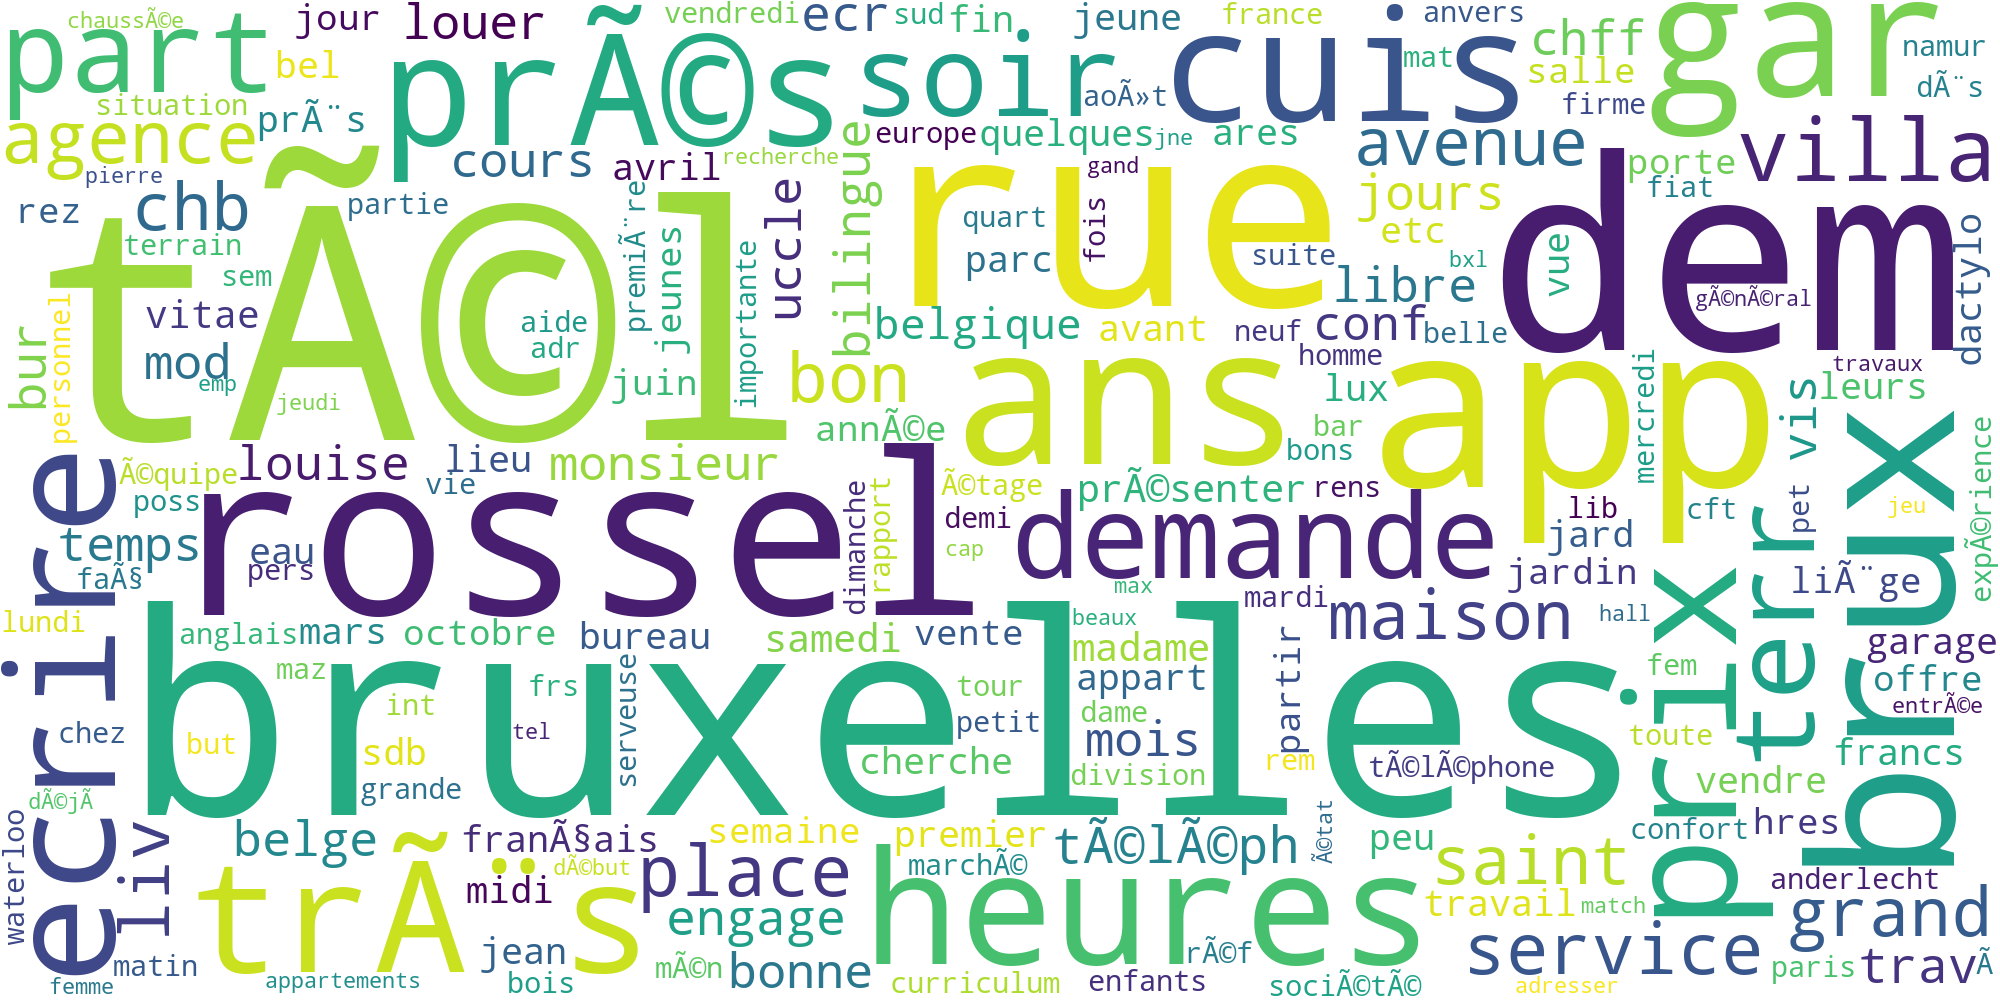

In [15]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))